DATA LOADING AND INSPECTION
-----------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler

#Classifier module
from sklearn.ensemble import GradientBoostingClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

Data Preprocessing
---------
Encoding
----

In [3]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
------------

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
-----

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


DATA MODELING
--------
GRADIENTBOOSTING CLASSIFIER
----------

In [7]:
#Initialize the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

#Train the model
gbc.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_gbc = gbc.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_gbc)
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)
f1 = f1_score(y_test, y_pred_gbc)
auc_roc = roc_auc_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier Accuracy: {accuracy :.4f}")
print(f"Gradient Boosting Classifier Precision: {precision :.4f}")
print(f"Gradient Boosting Classifier recall: {recall :.4f}")
print(f"Gradient Boosting Classifier f1_score: {f1 :.4f}")
print(f"Gradient Boosting Classifier auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_gbc))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("ROC AUC Score:", roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]))

print ("Gradient Boosting Classifier")
print("Training Accuracy :", gbc.score(X_train, y_train))

print("Testing Accuracy :", gbc.score(X_test, y_test))

Gradient Boosting Classifier Accuracy: 0.9483
Gradient Boosting Classifier Precision: 0.8132
Gradient Boosting Classifier recall: 0.8409
Gradient Boosting Classifier f1_score: 0.8268
Gradient Boosting Classifier auc_roc: 0.9039
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       512
         1.0       0.81      0.84      0.83        88

    accuracy                           0.95       600
   macro avg       0.89      0.90      0.90       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:
 [[495  17]
 [ 14  74]]
ROC AUC Score: 0.922607421875
Gradient Boosting Classifier
Training Accuracy : 0.9582875960482986
Testing Accuracy : 0.9483333333333334


CONFUSION MATRIX FOR GRADIENT BOOSTING CLASSIFIER
-----------------

In [8]:
y_pred_gbc = gbc.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_gbc).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 74
False positives: 17
True negatives: 495
False negatives: 14



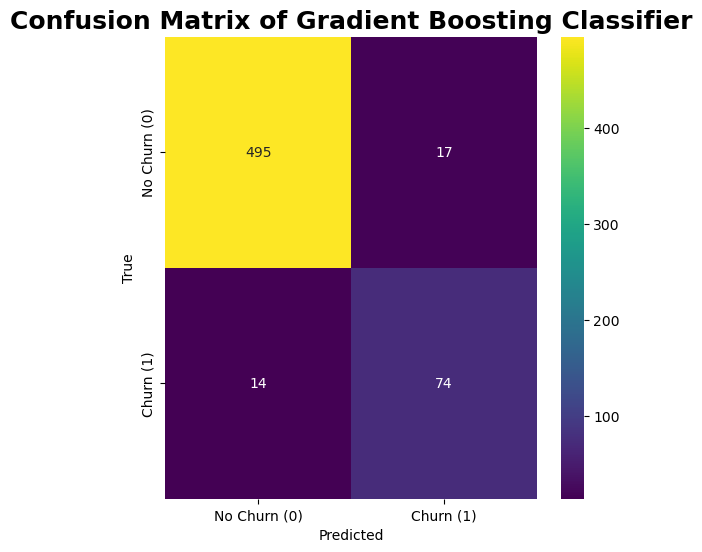

In [9]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbc)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Gradient Boosting Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

EVALUATION OF THE MACHINE LEARNING ALGORITHMS
-------------------

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["GradientBoosting Classifier"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_gbc)*100],
                         "PRECISION":[precision_score(y_test, y_pred_gbc)*100],
                          "RECALL":[recall_score(y_test, y_pred_gbc)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_gbc)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_gbc)*100], 
                           
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,GradientBoosting Classifier,94.833333,81.318681,84.090909,82.681564,90.385298


K_FOLD CROSS VALIDATION
----------------

ACCURACY
-------

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_accuracies = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(gbc_accuracies)
gbc_avg_accuracy = np.mean(gbc_accuracies)
gbc_std_accuracy = np.std(gbc_accuracies)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_accuracy * 100:.2f}%")

[0.96367521 0.93589744 0.93589744 0.94017094 0.9465812  0.94017094
 0.94646681 0.93576017 0.94218415 0.94860814]
The std score of cross validation using GradientBoosting Classifier algorithm is 0.81%
The mean score of cross validation using GradientBoosting Classifier algorithm is 94.35%


PRECISION
---------

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_precision = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(gbc_precision)
gbc_avg_precision = np.mean(gbc_precision)
gbc_std_precision = np.std(gbc_precision)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_precision * 100:.2f}%")

[0.97797357 0.95132743 0.95132743 0.95982143 0.95633188 0.96396396
 0.96846847 0.93939394 0.96832579 0.97727273]
The std score of cross validation using GradientBoosting Classifier algorithm is 1.16%
The mean score of cross validation using GradientBoosting Classifier algorithm is 96.14%


RECALL
---------

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_recall = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(gbc_recall)
gbc_avg_recall = np.mean(gbc_recall)
gbc_std_recall = np.std(gbc_recall)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_recall * 100:.2f}%")

[0.94871795 0.91880342 0.91880342 0.91880342 0.93589744 0.91452991
 0.92274678 0.93133047 0.91452991 0.91880342]
The std score of cross validation using GradientBoosting Classifier algorithm is 1.05%
The mean score of cross validation using GradientBoosting Classifier algorithm is 92.43%


F1_SCORE
------

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc_f1 = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(gbc_f1)
gbc_avg_f1 = np.mean(gbc_f1)
gbc_std_f1= np.std(gbc_f1)
print(f"The std score of cross validation using GradientBoosting Classifier algorithm is {gbc_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using GradientBoosting Classifier algorithm is {gbc_avg_f1 * 100:.2f}%")

[0.96312364 0.93478261 0.93478261 0.93886463 0.94600432 0.93859649
 0.94505495 0.93534483 0.94065934 0.94713656]
The std score of cross validation using GradientBoosting Classifier algorithm is 0.82%
The mean score of cross validation using GradientBoosting Classifier algorithm is 94.24%


CHECKING IF IT IS OVERFITTING OR NOT
-------------

In [15]:
if gbc_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test accuracy")

Model might be overfitting: Cross validation accuracy is lower than test accuracy


In [16]:
if gbc_avg_precision > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test precision")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test precision")

Model generalizes well: Cross_validation accuracy is higher or close to test precision


In [17]:
if gbc_avg_recall > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test recall")

Model generalizes well: Cross_validation accuracy is higher or close to test recall


In [18]:
if gbc_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test f1_score")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test f1_score")

Model generalizes well: Cross_validation accuracy is higher or close to test f1_score


Total KFold Validation
-------------------------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["GradientBoosting Classifier"], 
                           "ACCURACY":[gbc_avg_accuracy * 100],
                         "PRECISION":[gbc_avg_precision * 100],
                          "RECALL":[gbc_avg_recall * 100],
                          "F1_SCORE":[gbc_avg_f1 * 100],  
                           
                        })

final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,GradientBoosting Classifier,94.354124,96.142066,92.429661,94.2435
